your handicap = 44.64 ÷ 27.79 - 1 = 60.63
Which would give you the following medals in each age group:
U6: gold, [55, 83, 117, 186]
U8: gold, [48, 61, 81, 107]
U10: silver, [34, 50, 66, 84]
U12: bronze, [26, 41, 57, 75]
U14: bronze, [20, 34, 50, 67]
U16: None, [15, 26, 41, 56]
U18: None, [10, 19, 33, 50]
U21: None, [8, 16, 30, 46]
21-29: None, [8, 15, 28, 43]
30-34: None, [9, 16, 29, 46]
35-39: None, [10, 17, 31, 47]
40-44: None, [12, 18, 33, 48]
45-49: None, [13, 19, 34, 49]
50-54: None, [14, 22, 37, 55]
55-59: None, [15, 24, 42, 58]
60-64: bronze, [17, 28, 45, 61]
65-69: bronze, [19, 31, 47, 63]
70-74: bronze, [23, 35, 50, 66]
75-79: bronze, [25, 38, 54, 70]
80-84: silver, [30, 50, 65, 82]
85-89: silver, [35, 55, 70, 86]
90-94: gold, [45, 64, 80, 95]
95+: gold, [55, 74, 90, 115]


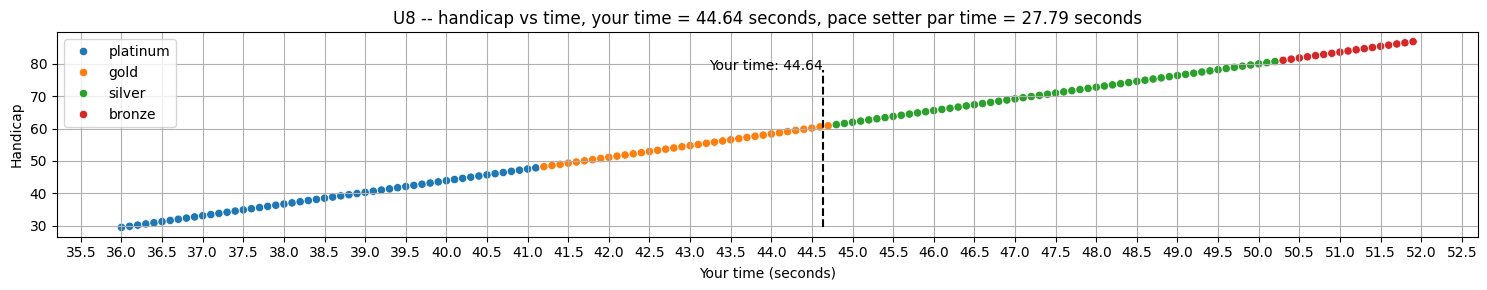

In [4]:
# calculate your medal, and how much faster you need to be to get the next medal
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

this_race_pace_setter_par_time = 27.79
your_race_time = 44.64
your_age_group = 'U8'
your_gender = 'male'


def calc_handicap(your_time: float, par_time: float) -> float:
    your_handicap = ((your_time / par_time) - 1) * 100
    return your_handicap

def which_medal(medals_max_time: list, your_handicap: float) -> str:
    medals = ["platinum", "gold", "silver", "bronze"]
    for i, max_time in enumerate(medals_max_time):
        try:
            if your_handicap < max_time:
                return medals[i]
        except:
            print(f"your handicap = {your_handicap} < {max_time} = {medals[i]}")

def graph_medal_vs_time(
    age_group: str, 
    your_time: float,
    pace_setter_par_time: float,
    ):
    X = []
    Y = []
    medals = []
    for this_time in range(int(your_time-8)*10,int(your_time+8)*10):
        this_time = this_time/10
        X.append(this_time)
        Y.append(calc_handicap(this_time, pace_setter_par_time))
        this_medal = which_medal(highest_handicaps_for_each_medal[age_group], calc_handicap(this_time, pace_setter_par_time))
        medals.append(this_medal)
        
    fig,ax = plt.subplots(1,1,figsize=(15,3))
    plt.setp(ax, xticks=np.linspace(0,100,201))
    sns.scatterplot(x=X, y=Y, hue=medals)
    ax.set_xlabel("Your time (seconds)")
    ax.set_ylabel("Handicap")
    ax.vlines(your_time, min(Y), max(Y)*0.9, colors="black", linestyles="dashed")
    ax.text(your_time, max(Y)*0.9, f"Your time: {your_time}", ha="right")
    ax.legend(loc='upper left')
    ax.grid()
    ax.set_title(f"{age_group} -- handicap vs time, your time = {your_time} seconds, pace setter par time = {pace_setter_par_time} seconds")
    plt.tight_layout()
    plt.show()

# highest handicap that gives platinum, gold, silver or bronze
highest_handicaps_for_each_medal_male = {
    'U6':[55, 83, 117, 186],
    'U8':[48, 61, 81, 107],
    'U10':[34, 50, 66, 84],
    'U12':[26, 41, 57, 75],
    'U14':[20, 34, 50, 67],
    'U16':[15, 26, 41, 56],
    'U18':[10, 19, 33, 50],
    'U21':[8, 16, 30, 46],
    '21-29':[8, 15, 28, 43],
    '30-34':[9, 16, 29, 46],
    '35-39':[10, 17, 31, 47],
    '40-44':[12, 18, 33, 48],
    '45-49':[13, 19, 34, 49],
    '50-54':[14, 22, 37, 55],
    '55-59':[15, 24, 42, 58],
    '60-64':[17, 28, 45, 61],
    '65-69':[19, 31, 47, 63],
    '70-74':[23, 35, 50, 66],
    '75-79':[25, 38, 54, 70],
    '80-84':[30, 50, 65, 82],
    '85-89':[35, 55, 70, 86],
    '90-94':[45, 64, 80, 95],
    '95+'  :[55, 74, 90, 115],
    }

if your_gender.lower() == 'male':
    highest_handicaps_for_each_medal = highest_handicaps_for_each_medal_male
elif your_gender.lower() == 'female':
    highest_handicaps_for_each_medal = highest_handicaps_for_each_medal_female
else:
    raise ValueError(f"Gender {your_gender} hast to be male or female until Naster updates their charts.")

# do the calculations and make the figures
your_handicap = calc_handicap(your_race_time, this_race_pace_setter_par_time)
print(f"your handicap = {your_race_time} ÷ {this_race_pace_setter_par_time} - 1 = {your_handicap:0.2f}")
print('Which would give you the following medals in each age group:')
for k,v in highest_handicaps_for_each_medal.items():
    print(f"{k}: {which_medal(v,your_handicap)}, {highest_handicaps_for_each_medal[k]}")

graph_medal_vs_time(age_group = your_age_group,
                    your_time = your_race_time,
                    pace_setter_par_time = this_race_pace_setter_par_time
                    )